In [ ]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sb
import pandas as pd
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as la
sns.set(style='whitegrid')
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [ ]:
df = sb.load_dataset('iris', index_col='species')
print(df)

           sepal_length  sepal_width  petal_length  petal_width
species                                                        
setosa              5.1          3.5           1.4          0.2
setosa              4.9          3.0           1.4          0.2
setosa              4.7          3.2           1.3          0.2
setosa              4.6          3.1           1.5          0.2
setosa              5.0          3.6           1.4          0.2
...                 ...          ...           ...          ...
virginica           6.7          3.0           5.2          2.3
virginica           6.3          2.5           5.0          1.9
virginica           6.5          3.0           5.2          2.0
virginica           6.2          3.4           5.4          2.3
virginica           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [ ]:
X = df
R = X.corr()
l, e = np.linalg.eig(R)
idx = np.argsort(l)[::-1]
l = l[idx]
e = e[:,idx]

In [ ]:
X.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
X.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


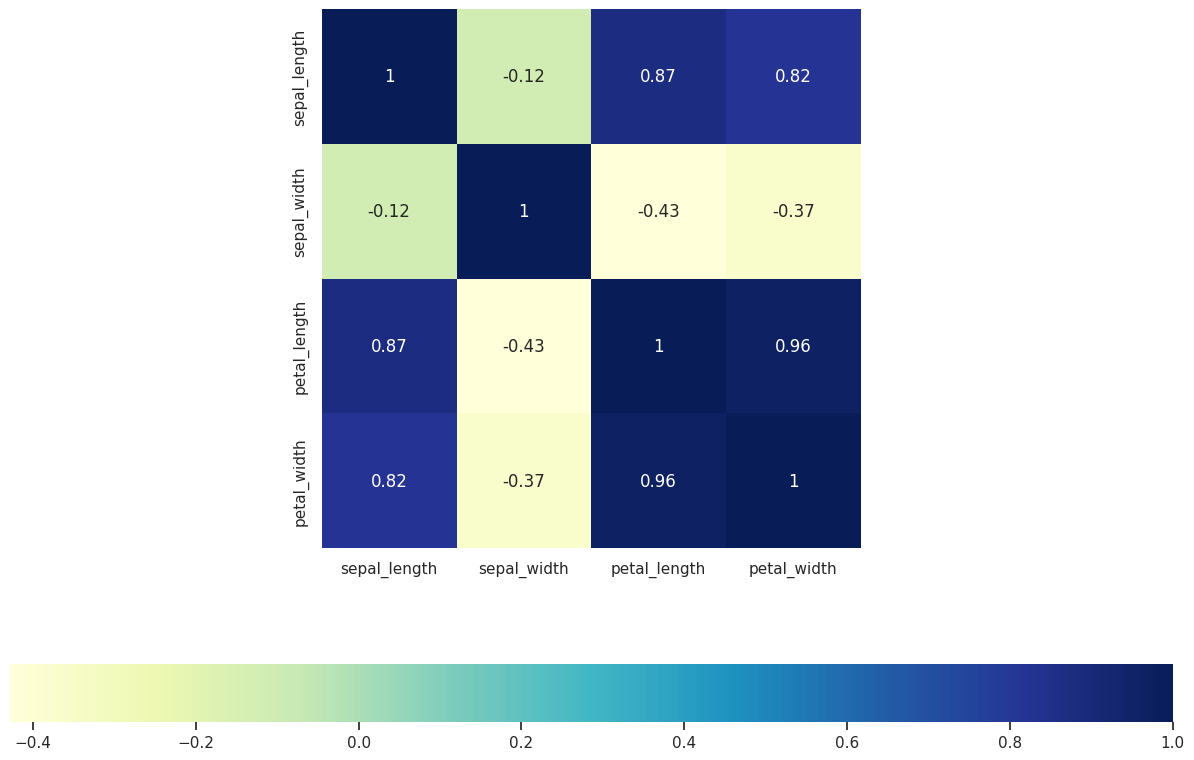

In [ ]:
plt.figure(figsize=(15,10))
ax = sb.heatmap(X.corr(),
                 annot=True,
                 cmap='YlGnBu',
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")

In [ ]:
pca = PCA()
resultado_pca = pca.fit_transform(scale(X))
resultado = pd.DataFrame({'cp1':resultado_pca[:, 0], 'cp2':resultado_pca[:, 1], 'cp3':resultado_pca[:, 2], 'cp4':resultado_pca[:, 3]}, index=X.index)
print(resultado)

                cp1       cp2       cp3       cp4
species                                          
setosa    -2.264703  0.480027 -0.127706 -0.024168
setosa    -2.080961 -0.674134 -0.234609 -0.103007
setosa    -2.364229 -0.341908  0.044201 -0.028377
setosa    -2.299384 -0.597395  0.091290  0.065956
setosa    -2.389842  0.646835  0.015738  0.035923
...             ...       ...       ...       ...
virginica  1.870503  0.386966  0.256274 -0.389257
virginica  1.564580 -0.896687 -0.026371 -0.220192
virginica  1.521170  0.269069  0.180178 -0.119171
virginica  1.372788  1.011254  0.933395 -0.026129
virginica  0.960656 -0.024332  0.528249  0.163078

[150 rows x 4 columns]


## **Com a funcao pca.explained_variance_ratio_ conseguimos observar que possuimos 2 parametros que tem uma significancia visualmente maior do que os demais.**

In [ ]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

Segue um grafico que relaciona a variancia explicaca com a acumulada, reafirmando o que foi proposto anteriormente, de que CP1 e CP2 possuem uma significancia de dados mais relevante que o CP3 e o CP4

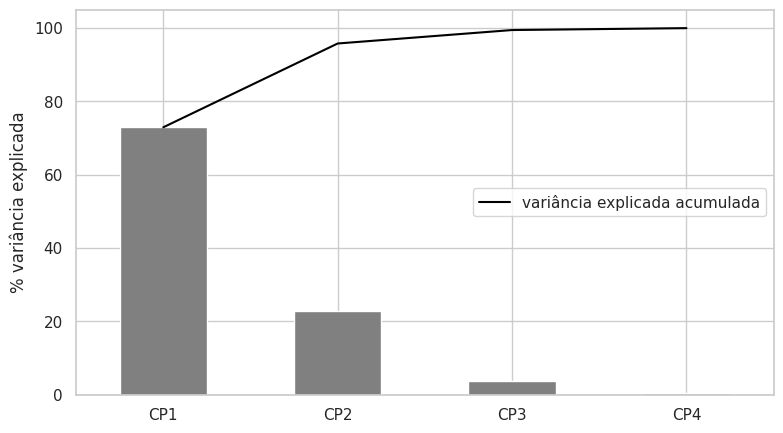

In [ ]:
tot = sum(pca.explained_variance_)
var_exp = [(i / tot)*100 for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
# número de CPs gerados (k = p)
cp =['CP'+str(i+1) for i in range(len(pca.components_))]
# dataframe com as variâncias acumuladas para criar o scree plot
df = pd.DataFrame({'cp': cp, 'var_exp': var_exp, 'cum_var_exp': cum_var_exp})
# scree plot com %
fig, ax = plt.subplots(figsize=(9,5))
df.plot.bar('cp', 'var_exp', color='gray', ax=ax, legend=False)
df.plot.line('cp', 'cum_var_exp', color='black', ax=ax)
plt.legend(labels=['variância explicada acumulada'],
           loc='center right',)
plt.ylabel('% variância explicada')
plt.xlabel('');

Segue um grafico que demonstra quanto cada variavel influencia nos componentes

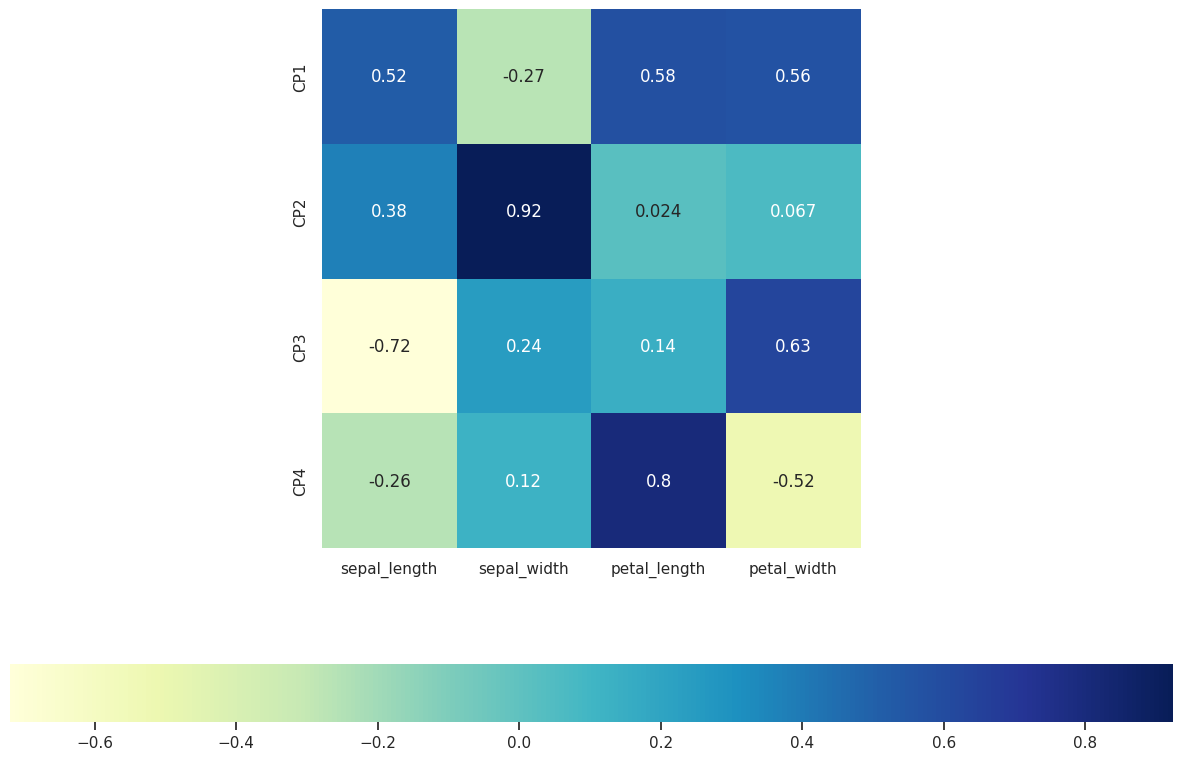

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(pca.components_,
                 annot=True,
                 cmap='YlGnBu',
                 yticklabels=[ "CP"+str(X) for X in range(1,pca.n_components_+1)],
                 xticklabels=list(X.columns),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")


## A partir de agora iremos trabalhar somente com os componentes CP1 e CP2

Grafico que correlaciona as 4 variaveis do df com os componentes e suas relacoes.
Com os graficos a seguir conseguimos ver uma distincao clara entre a especie 'setosa' das demais. Percebe-se tambem que o 'versicolor' e o 'virginica' possuem semelhancas que atrapalham nossa analise.


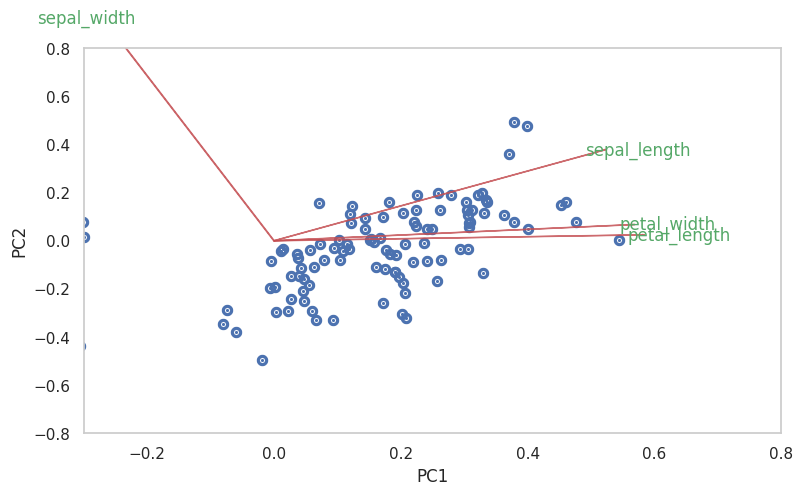

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley,s=5, linewidths = 6)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.8)
        if labels is None:
            plt.text(coeff[i,0]* 1.1, coeff[i,1] * 1, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.1, coeff[i,1] * 1, labels[i], color = 'g', ha = 'center', va = 'center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    ax.set(xlim=(-0.3, 0.8), ylim=(-0.8, 0.8))
    plt.grid()

myplot(resultado_pca[:,0:2],np.transpose(pca.components_[0:2, :]),list(X.columns))
plt.show()

No grafico a seguir conseguimos distinguir facilmente a especie 'setosa' das demais, pois a amostra foi selecionada para funcionar com 2 clusters, apos a analise anterior.

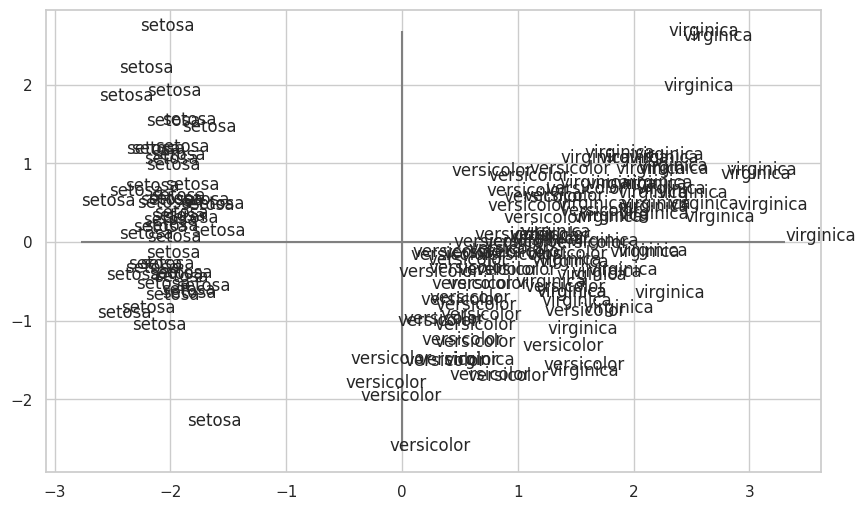

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.scatter(resultado.cp1, resultado.cp2, s=0)
for i, txt in enumerate(resultado.index):
    ax.annotate(txt, (resultado.cp1[i], resultado.cp2[i]))
plt.hlines(0, resultado_pca[:, 0].min(), resultado_pca[:, 0].max(), color='gray')
plt.vlines(0, resultado_pca[:, 1].min(), resultado_pca[:, 1].max(), color='gray');

## Aplicando DBScan no nosso DF para confirmar nossa informacao citada anteriormente

In [ ]:
def DBSCAN2De3D(df, Eps, MSamples):
  df = df
  clustering = DBSCAN(eps=Eps, min_samples=MSamples).fit(df)

  labels = clustering.labels_

  if -1 in labels:
    NumCluster = len(set(labels)) - 1
  else:
    NumCluster = len(set(labels))

  NumOutlier = list(labels).count(-1)

  print("Numero de Cluster : ", NumCluster)
  print("Numero de Outlier : ", NumOutlier)

  Parametros = set(labels)
  indice = np.zeros_like(labels, dtype=bool)
  indice[clustering.core_sample_indices_] = True

  coresGraph = []

  for i in np.linspace(0,1,len(Parametros)):
    coresGraph.append(plt.cm.Spectral(i))


  for k,col in zip(Parametros, coresGraph):
    if k == -1:
      col = [0,0,0,1]
    Value_info = labels == k
    xy = df[Value_info & ~indice]
    plt.plot(xy[:,0], xy[:,1], "o", markerfacecolor = tuple(col), markersize = 1, markeredgecolor = "k")

    xy = df[Value_info & indice]
    plt.plot(xy[:,0], xy[:,1], "o", markerfacecolor = tuple(col), markersize = 10, markeredgecolor = "k")

  plotTakensPCA(df, labels, d=3)

In [ ]:
def plotTakensPCA(df, col, d=3):
    import plotly.express as px
    from sklearn.decomposition import PCA

    pca = PCA(n_components=d)
    components = pca.fit_transform(df)

    total_var = pca.explained_variance_ratio_.sum() * 100

    if d == 3:
        fig = px.scatter_3d(
            components, x=0, y=1, z=2,
            title=f'Total Explained Variance: {total_var:.2f}%',
            labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}, color = col)
        fig.show()
    elif d == 2:
        fig = px.scatter(components, x=0, y=1, title=f'Total Explained Variance: {total_var:.2f}%',
                         labels={'0': 'PC 1', '1': 'PC 2'}, color = col)
        fig.show()
    elif d == 1:
        fig = px.scatter(components, x=0, y=0, title=f'Total Explained Variance: {total_var:.2f}%',
                         labels={'0': 'PC 1'}, color=col)
        fig.show()
    else:
        labels = {str(i): f"PC {i + 1} ({var:.1f}%)" for i, var in enumerate(pca.explained_variance_ratio_ * 100)}

        fig = px.scatter_matrix(
            components,
            labels=labels,
            dimensions=range(d),
        )
        fig.update_traces(diagonal_visible=False)
        fig.show()



Ja no grafico a seguir, assumindo que sao 3 especies distintas, conseguimos plota-lo com 3 clusters. Fica perceptivel que existem 2 clusters que sao demonstrados com uma certa influencia um sob o outro, pelo fato de nossa demonstracao estar em 2D, ha uma perda de informacoes que nos traz esse resultado.

Numero de Cluster :  3
Numero de Outlier :  38


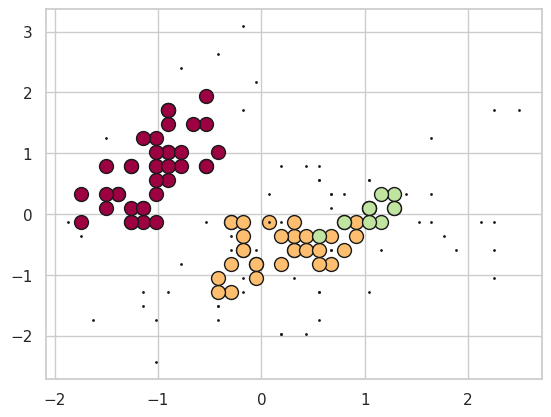

In [ ]:
dfIris = sb.load_dataset('iris')
dfIris = dfIris.drop(columns = 'species')
dfIris = dfIris.to_numpy()
dfIris = StandardScaler().fit_transform(dfIris)
Eps = 0.52
MSamples = 6
DBSCAN2De3D(dfIris, Eps, MSamples)

In [ ]:
dfCustomers = pd.read_csv('Customers.csv')
dfCustomers = dfCustomers.set_index('Profession')
dfCustomers = dfCustomers.drop("Gender", axis='columns')
dfCustomers = dfCustomers.drop("Annual Income ($)", axis='columns')
dfCustomers = dfCustomers.drop("Age", axis='columns')
dfCustomers = dfCustomers.drop("CustomerID", axis='columns')
dfCustomers

,Spending Score (1-100),Work Experience,Family Size
Profession,,,
Healthcare,39,1,4
Engineer,81,3,3
Engineer,6,1,1
Lawyer,77,0,2
Entertainment,40,2,6
...,...,...,...
Artist,40,8,7
Doctor,32,7,7
Healthcare,14,9,2


In [ ]:
X = dfCustomers
R = X.corr()
l, e = np.linalg.eig(R)
idx = np.argsort(l)[::-1]
l = l[idx]
e = e[:,idx]
X.describe()
X.corr()
pca = PCA()
resultado_pca = pca.fit_transform(scale(X))
resultado = pd.DataFrame({'cp1':resultado_pca[:, 0], 'cp2':resultado_pca[:, 1], 'cp3':resultado_pca[:, 2]}, index=X.index)
print(resultado)

                    cp1       cp2       cp3
Profession                                 
Healthcare    -0.255748 -0.092976 -0.865585
Engineer      -1.000913  0.029951  0.620699
Engineer       0.175213 -1.946388 -1.171879
Lawyer        -1.569751 -0.532460  0.147873
Entertainment  0.135907  0.872441 -0.971968
...                 ...       ...       ...
Artist         1.346287  1.419914 -0.058639
Doctor         1.353173  1.299029 -0.422550
Healthcare     1.561021 -1.265028  0.283208
Executive      1.432892 -1.425885 -0.305066
Entertainment -0.066933 -0.804588  0.455642

[2000 rows x 3 columns]


In [ ]:
pca.explained_variance_ratio_

array([0.34351909, 0.33385441, 0.32262649])

Com o grafico a baixo temos um bom exemplo do que nao pode acontecer para um agrupamento por DBScan. Que é um grafico de variancai explicada acumulada linear, que representa que os componentes nao se diferenciam muito

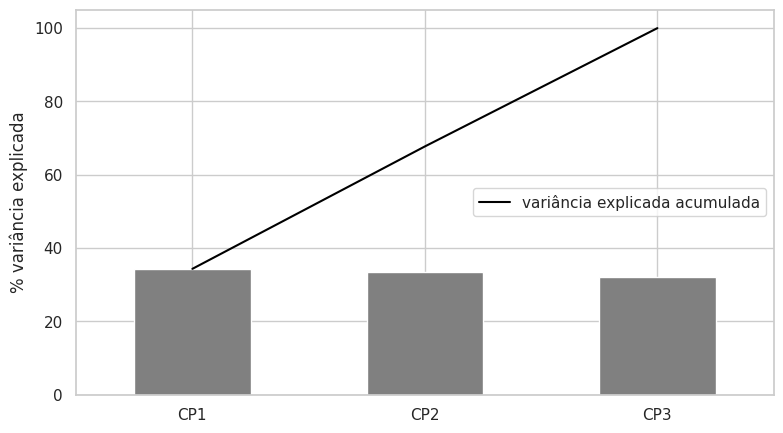

In [ ]:
tot = sum(pca.explained_variance_)
var_exp = [(i / tot)*100 for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
# número de CPs gerados (k = p)
cp =['CP'+str(i+1) for i in range(len(pca.components_))]
# dataframe com as variâncias acumuladas para criar o scree plot
df = pd.DataFrame({'cp': cp, 'var_exp': var_exp, 'cum_var_exp': cum_var_exp})
# scree plot com %
fig, ax = plt.subplots(figsize=(9,5))
df.plot.bar('cp', 'var_exp', color='gray', ax=ax, legend=False)
df.plot.line('cp', 'cum_var_exp', color='black', ax=ax)
plt.legend(labels=['variância explicada acumulada'],
           loc='center right',)
plt.ylabel('% variância explicada')
plt.xlabel('');

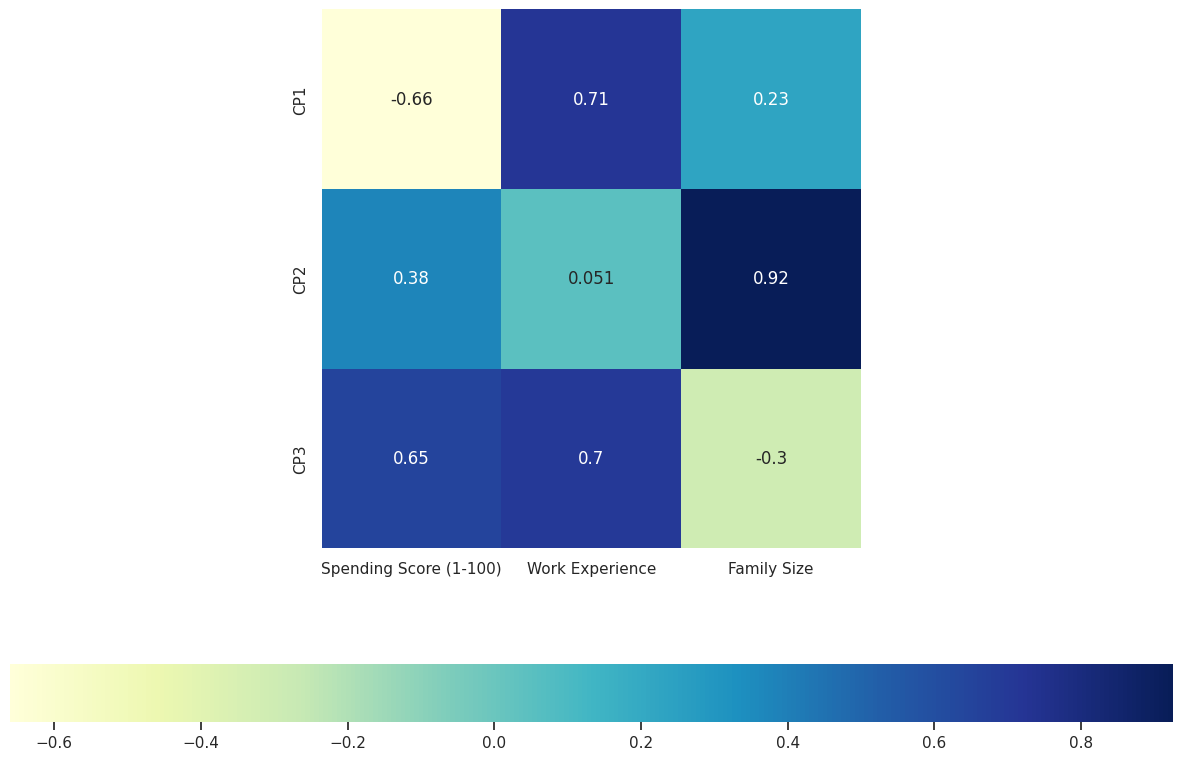

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(pca.components_,
                 annot=True,
                 cmap='YlGnBu',
                 yticklabels=[ "CP"+str(X) for X in range(1,pca.n_components_+1)],
                 xticklabels=list(X.columns),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")


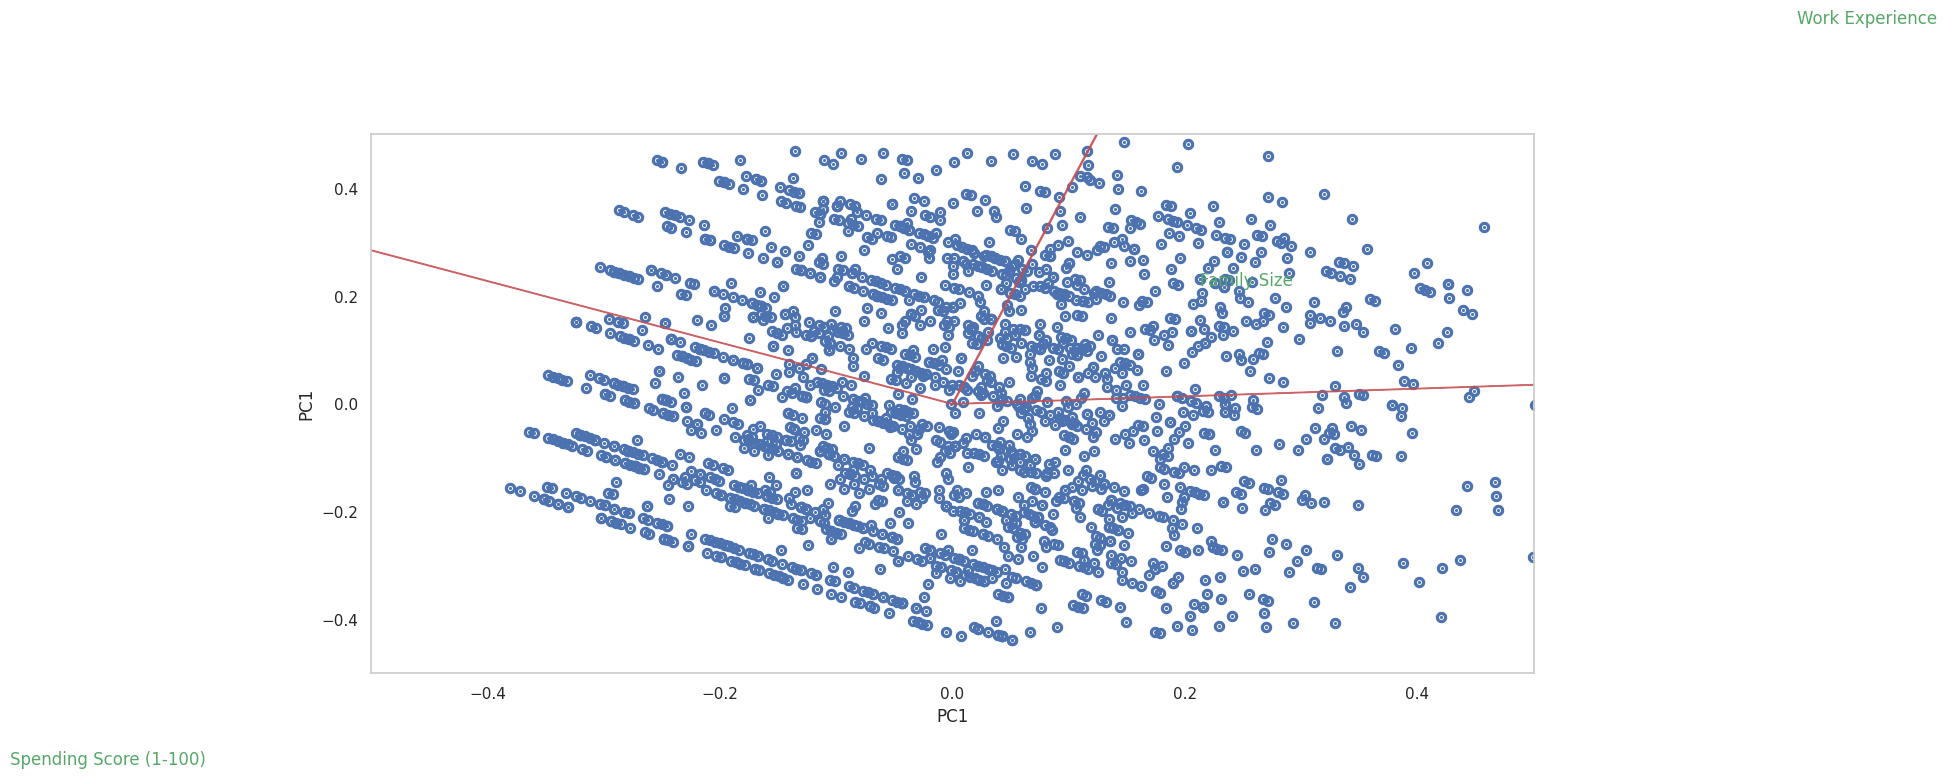

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley,s=5, linewidths = 6)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.8)
        if labels is None:
            plt.text(coeff[i,0]* 1.1, coeff[i,0] * 1, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.1, coeff[i,0] * 1, labels[i], color = 'g', ha = 'center', va = 'center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(1))
    ax.set(xlim=(-0.5, 0.5), ylim=(-0.5, 0.5))
    plt.grid()

myplot(resultado_pca[:,0:2],np.transpose(pca.components_[0:2, :]),list(X.columns))
plt.show()

Aqui conseguimos perceber o quao impreciso é esse DataFrame com agrupamento.

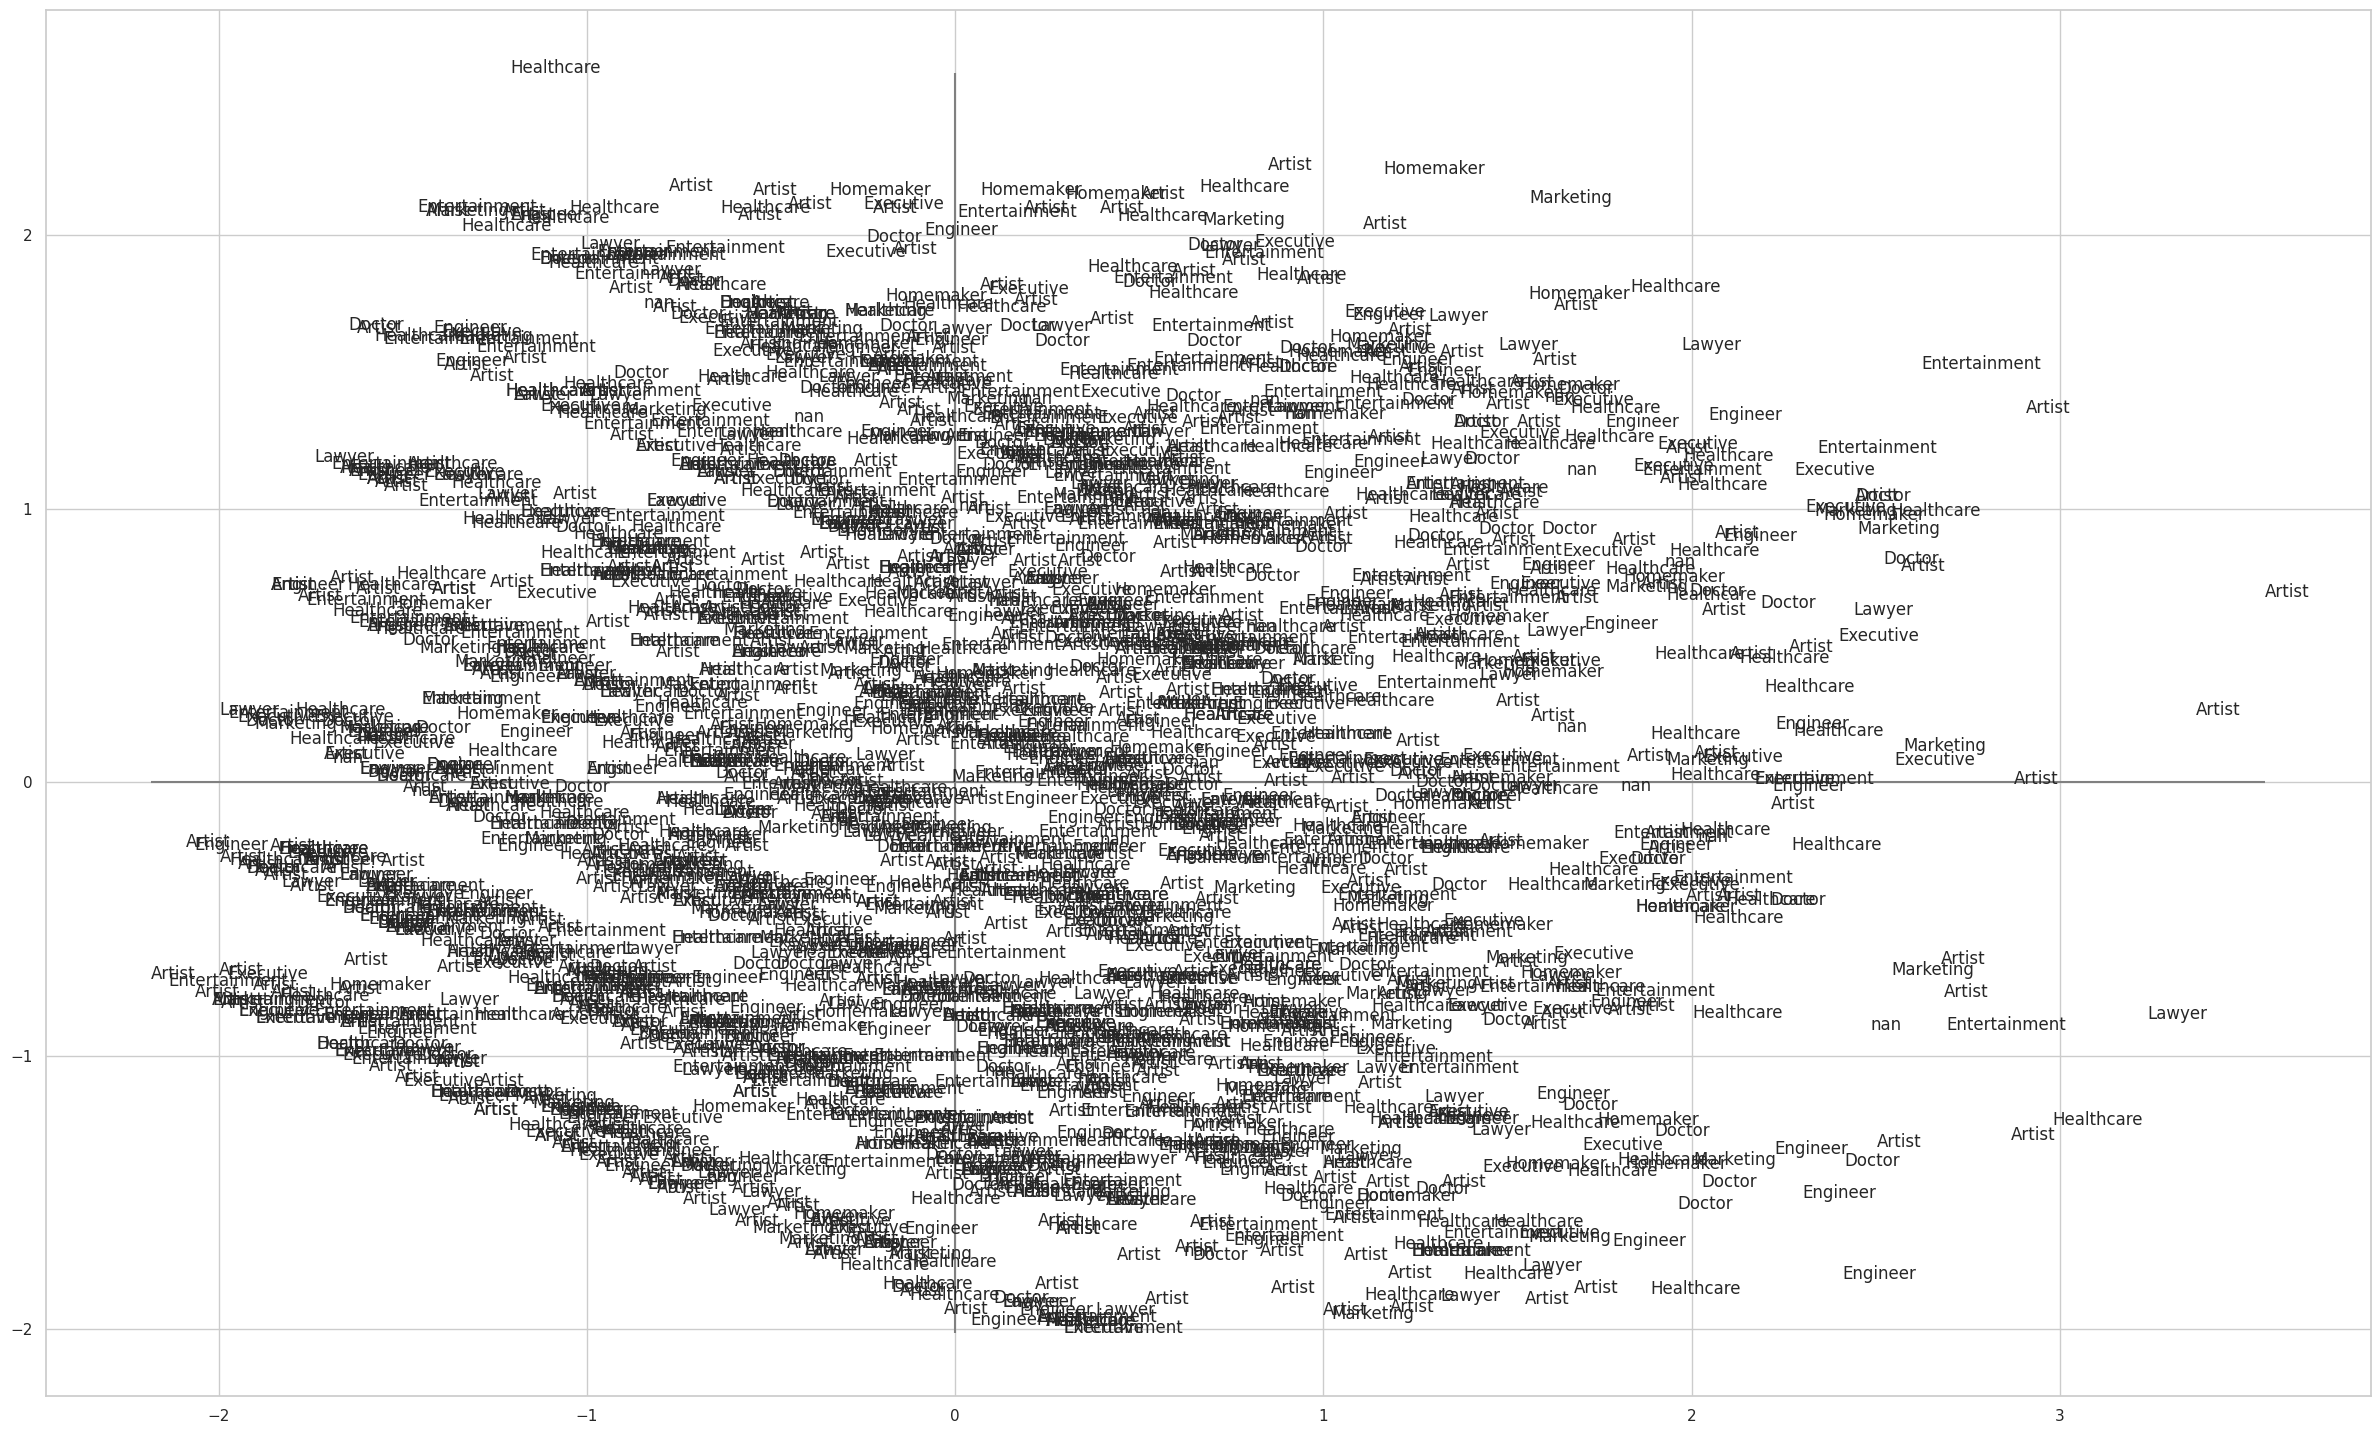

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 18)
ax.scatter(resultado.cp1, resultado.cp2, s=0)
for i, txt in enumerate(resultado.index):
    ax.annotate(txt, (resultado.cp1[i], resultado.cp2[i]))
plt.hlines(0, resultado_pca[:, 0].min(), resultado_pca[:, 0].max(), color='gray')
plt.vlines(0, resultado_pca[:, 1].min(), resultado_pca[:, 1].max(), color='gray');

Com um plot 3D, utilizando a técnica PCA, podemos observar a existencia de 7 grupos, onde se distribuem por toda o grafico de maneira um pouco homogenea.

array([[<Axes: title={'center': 'Spending Score (1-100)'}>,
        <Axes: title={'center': 'Work Experience'}>],
       [<Axes: title={'center': 'Family Size'}>, <Axes: >]], dtype=object)

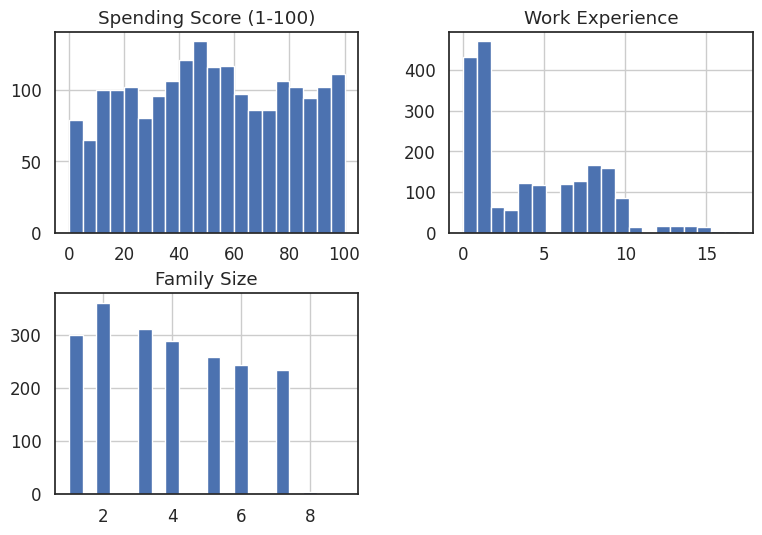

In [ ]:
dfCustomers = pd.read_csv('Customers.csv')
dfCustomers = dfCustomers.set_index('Profession')
dfCustomers = dfCustomers.drop("Gender", axis='columns')
dfCustomers = dfCustomers.drop("Annual Income ($)", axis='columns')
dfCustomers = dfCustomers.drop("Age", axis='columns')
dfCustomers = dfCustomers.drop("CustomerID", axis='columns')
dfCustomers.hist(bins=20)

Numero de Cluster :  8
Numero de Outlier :  92


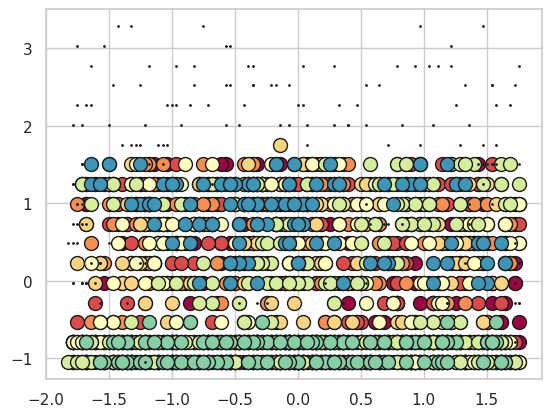

In [ ]:
dfCustomers = pd.read_csv('Customers.csv')
dfCustomers = dfCustomers.set_index('Profession')
dfCustomers = dfCustomers.drop("Gender", axis='columns')
dfCustomers = dfCustomers.drop("Annual Income ($)", axis='columns')
dfCustomers = dfCustomers.drop("Age", axis='columns')
dfCustomers = dfCustomers.drop("CustomerID", axis='columns')
dfCustomers = dfCustomers.to_numpy()
dfCustomers = StandardScaler().fit_transform(dfCustomers)
Eps = 0.5
MSamples = 8
DBSCAN2De3D(dfCustomers, Eps, MSamples)
#dfCustomers

## Aplicando DBScan para os DataFrames estudados

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
dfIris = sb.load_dataset('iris')
dfIris = dfIris.drop(columns = 'species')
dfIris
scaler = StandardScaler()
X = dfIris.iloc[:, [0,1,2,3]].values
X_normalize = scaler.fit_transform(X)
KmeansData = KMeans(n_clusters=3, random_state=42)
rotulos_kmeans = KmeansData.fit_predict(X_normalize)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



## Elbow Method

In [ ]:
wcss = []
for i in range(1,11):
  KmeansData_e = KMeans(n_clusters=i, random_state=42)
  KmeansData_e.fit(X_normalize)
  wcss.append(KmeansData_e.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

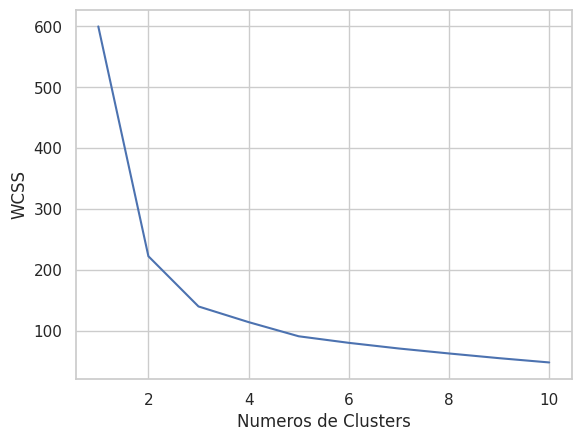

In [ ]:
plt.plot(range(1,11), wcss)
plt.xlabel('Numeros de Clusters')
plt.ylabel('WCSS')
plt.show()

Aplicando o K-Means no nosso DataFrame Iris, percebemos que diferentes modelos de agrupamento geram diferentes resultados. Utilizando o exemplo do Iris, nosso DataFrame traz resultados muito mais aplicaveis utilizando DBScan, quando comparado com K-Means

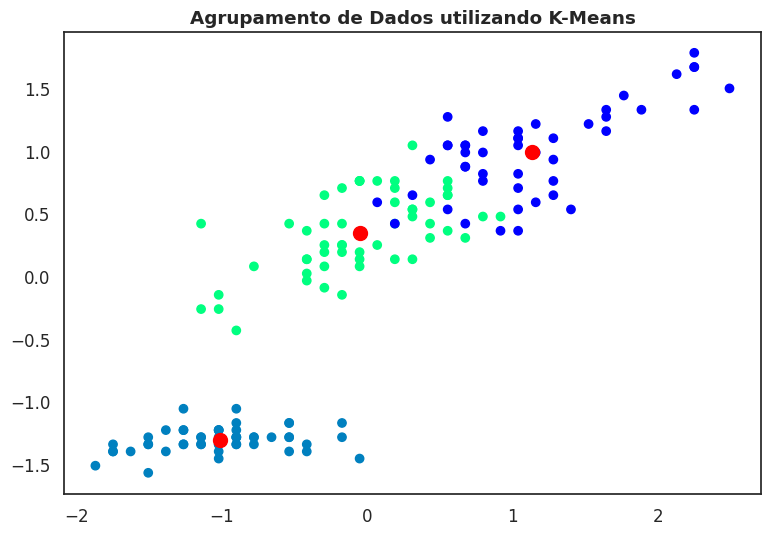

In [ ]:
sns.set(style='white', rc={'figure.figsize':(9,6)}, font_scale=1.1)

plt.scatter(x=X_normalize[:,0], y=X_normalize[:,2], c=rotulos_kmeans, cmap='winter')

plt.scatter(KmeansData.cluster_centers_[:,0],KmeansData.cluster_centers_[:,2],s=100, c='red')
plt.title('Agrupamento de Dados utilizando K-Means', fontweight='bold')
plt.show()

Aplicando K-Means no DataFrame Customers, comprovamos que com a analise feita e com os dados relacionados, nao conseguimos obter um dado relevante o suficiente para aplicar uma analise. Serve como um exemplo que demonstra que vai dar errado desde o primeiro grafico, inclusive seu elbow method tambem se distribui de maneira nao satisfatoria.

In [ ]:
dfCustomers = pd.read_csv('Customers.csv')
dfCustomers = dfCustomers.set_index('Profession')
dfCustomers = dfCustomers.drop("Gender", axis='columns')
dfCustomers = dfCustomers.drop("Annual Income ($)", axis='columns')
dfCustomers = dfCustomers.drop("Age", axis='columns')
dfCustomers = dfCustomers.drop("CustomerID", axis='columns')
scaler = StandardScaler()
X = dfCustomers.iloc[:, [0,1,2]].values
X_normalize = scaler.fit_transform(X)
KmeansData = KMeans(n_clusters=8, random_state=42)
rotulos_kmeans = KmeansData.fit_predict(X_normalize)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

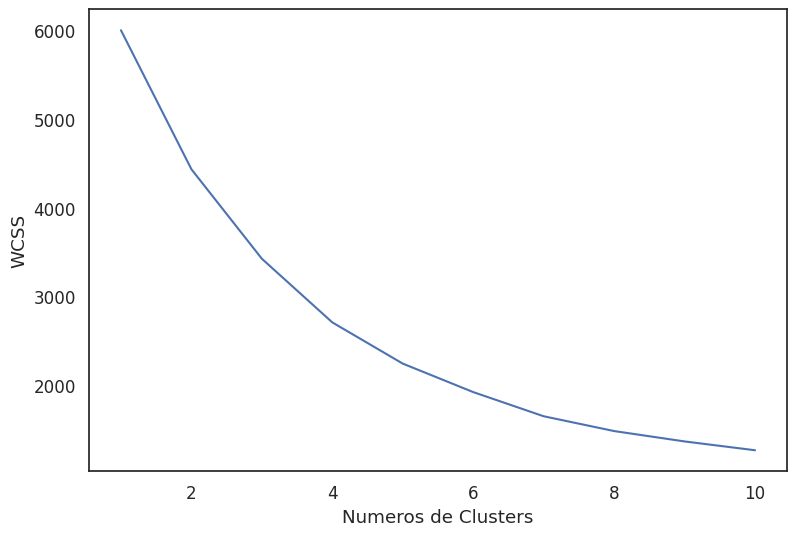

In [ ]:
wcss = []
for i in range(1,11):
  KmeansData_e = KMeans(n_clusters=i, random_state=42)
  KmeansData_e.fit(X_normalize)
  wcss.append(KmeansData_e.inertia_)

plt.plot(range(1,11), wcss)
plt.xlabel('Numeros de Clusters')
plt.ylabel('WCSS')
plt.show()

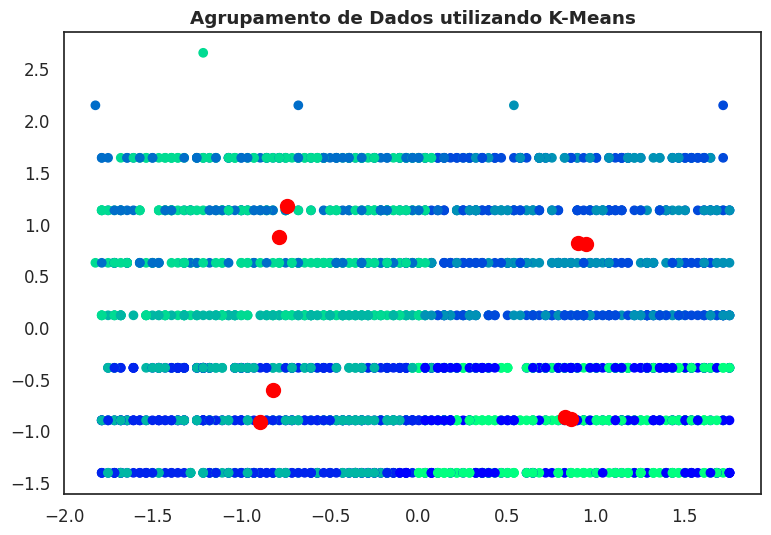

In [ ]:
sns.set(style='white', rc={'figure.figsize':(9,6)}, font_scale=1.1)

plt.scatter(x=X_normalize[:,0], y=X_normalize[:,2], c=rotulos_kmeans, cmap='winter')

plt.scatter(KmeansData.cluster_centers_[:,0],KmeansData.cluster_centers_[:,2],s=100, c='red')
plt.title('Agrupamento de Dados utilizando K-Means', fontweight='bold')
plt.show()

In [ ]:
plotTakensPCA(dfCustomers, rotulos_kmeans, d=3)

In [ ]:
dfCustomers

,Spending Score (1-100),Work Experience,Family Size
Profession,,,
Healthcare,39,1,4
Engineer,81,3,3
Engineer,6,1,1
Lawyer,77,0,2
Entertainment,40,2,6
...,...,...,...
Artist,40,8,7
Doctor,32,7,7
Healthcare,14,9,2
